In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql
import seaborn as sns

In [2]:
tele_data=pd.read_excel(r"float.xlsx",header=0)

tele_data_bk=tele_data.copy()

tele_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

tele_data['gender'] = LE.fit_transform(tele_data['gender'])
tele_data['MultipleLines']=LE.fit_transform(tele_data['MultipleLines'])

tele_data['Partner']=LE.fit_transform(tele_data['Partner'])
tele_data['Dependents']=LE.fit_transform(tele_data['Dependents'])
tele_data['PaperlessBilling'] =LE.fit_transform(tele_data['PaperlessBilling'])
tele_data['PhoneService']=LE.fit_transform(tele_data['PhoneService'])
tele_data['InternetService'] = LE.fit_transform(tele_data['InternetService'])
tele_data['OnlineSecurity'] = LE.fit_transform(tele_data['OnlineSecurity'])
tele_data['OnlineBackup'] = LE.fit_transform(tele_data['OnlineBackup'])
tele_data['DeviceProtection'] = LE.fit_transform(tele_data['DeviceProtection'])
tele_data['TechSupport'] = LE.fit_transform(tele_data['TechSupport'])
tele_data['StreamingTV'] = LE.fit_transform(tele_data['StreamingTV'])
tele_data['StreamingMovies'] = LE.fit_transform(tele_data['StreamingMovies'])
tele_data['Contract'] = LE.fit_transform(tele_data['Contract'])
tele_data['PaymentMethod'] = LE.fit_transform(tele_data['PaymentMethod'])




In [5]:
tele_data['Churn'].replace(['Yes','No'],[0,1],inplace=True)
tele_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,1
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,1
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,1
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0


In [6]:
del tele_data['customerID']

In [7]:
tele_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
tele_data.describe

<bound method NDFrame.describe of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0      

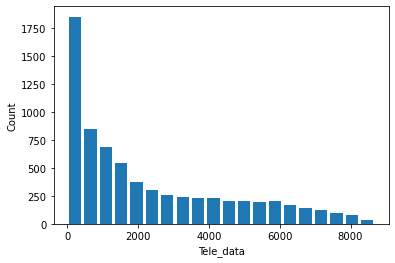

In [9]:
plt.hist(tele_data.TotalCharges, bins=20, rwidth=0.8)
plt.xlabel('Tele_data')
plt.ylabel('Count')
plt.show()

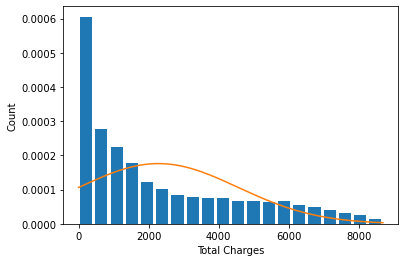

In [10]:
from scipy.stats import norm

plt.hist(tele_data.TotalCharges, bins=20, rwidth=0.8, density=True)
plt.xlabel('Total Charges')
plt.ylabel('Count')

rng = np.arange(tele_data.TotalCharges.min(), tele_data.TotalCharges.max(), 0.1)
plt.plot(rng, norm.pdf(rng, tele_data.TotalCharges.mean(),tele_data.TotalCharges.std()))

In [11]:
upper_limit = round(tele_data.TotalCharges.mean() + 3 * tele_data.TotalCharges.std(),3)
upper_limit

9080.118

In [12]:
lower_limit = round(tele_data.TotalCharges.mean() - 3 * tele_data.TotalCharges.std(),3)
lower_limit

-4520.649

In [13]:
# Eliminate the outlier and write data to new file

tele_data = tele_data[(tele_data.TotalCharges > lower_limit) & (tele_data.TotalCharges < upper_limit)]
tele_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,1
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,1
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,0
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,0


In [14]:
cols1=['tenure','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','MonthlyCharges','TotalCharges']

In [15]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in tele_data.columns:
    if col != 'Churn':
        IndepVar.append(col)

TargetVar = 'Churn'

x = tele_data[IndepVar]
y = tele_data[TargetVar]

In [16]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4930, 19), (2113, 19), (4930,), (2113,))

In [17]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

In [18]:
# Load the Results dataset

CSResults = pd.read_csv(r"HTResults.csv", header=0)

CSResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[1389  150]
 [ 251  323]]
Outcome values : 
 1389 150 251 323
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.90      0.87      1539
           0       0.68      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.75      2113
weighted avg       0.80      0.81      0.80      2113

Accuracy : 81.0 %
Precision : 84.7 %
Recall : 90.3 %
F1 Score : 0.874
Specificity or True Negative Rate : 56.3 %
Balanced Accuracy : 73.3 %
MCC : 0.496
roc_auc_score: 0.733


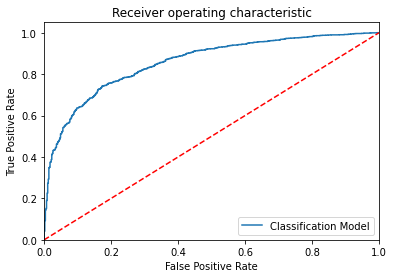

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[1414  125]
 [ 298  276]]
Outcome values : 
 1414 125 298 276
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.92      0.87      1539
           0       0.69      0.48      0.57       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy : 80.0 %
Precision : 82.6 %
Recall : 91.9 %
F1 Score : 0.87
Specificity or True Negative Rate : 48.1 %
Balanced Accuracy : 70.0 %
MCC : 0.453
roc_auc_score: 0.7


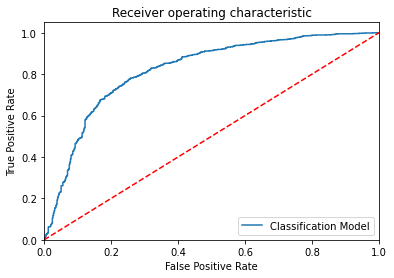

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[1390  149]
 [ 272  302]]
Outcome values : 
 1390 149 272 302
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.90      0.87      1539
           0       0.67      0.53      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy : 80.1 %
Precision : 83.6 %
Recall : 90.3 %
F1 Score : 0.868
Specificity or True Negative Rate : 52.6 %
Balanced Accuracy : 71.4 %
MCC : 0.466
roc_auc_score: 0.715


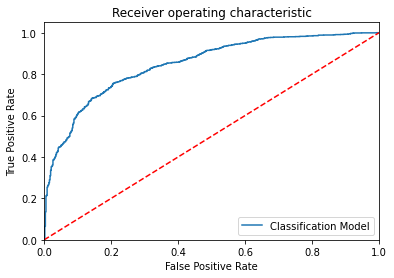

-----------------------------------------------------------------------------------------------------


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import lightgbm as lgb

ModelLR = LogisticRegression()
ModelSVM = SVC(probability=True)
ModelLGB = lgb.LGBMClassifier()
MM = [ModelLR, ModelSVM, ModelLGB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)

In [20]:
CSResults.head(20)

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),1389,150,251,323,0.810,0.847,0.903,0.874,0.563,0.496,0.732626,0.733
1,SVC(probability=True),1414,125,298,276,0.800,0.826,0.919,0.870,0.481,0.453,0.699807,0.700
2,LGBMClassifier(),1390,149,272,302,0.801,0.836,0.903,0.868,0.526,0.466,0.714658,0.714


In [21]:
# Results

PredResults = pd.DataFrame({'Churn_Actual':y_test, 'Churn_Pred':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = tele_data_bk.merge(PredResults, left_index=True, right_index=True)

# Display 10 records randomly

TestDataResults.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Actual,Churn_Pred
1101,4712-UYOOI,Female,0,Yes,Yes,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.00,417.65,No,1,1
6284,2985-FMWYF,Female,0,No,No,23,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.50,2341.55,No,1,1
6641,2810-FTLEM,Female,0,No,No,16,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,50.15,762.25,Yes,0,1
6410,6121-TNHBO,Female,1,No,No,63,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),83.00,5243.05,No,1,1
4679,8218-FFJDS,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),86.40,6058.95,No,1,1


In [22]:
TestDataResults['Churn_Actual']=TestDataResults['Churn_Actual'].apply(str)
TestDataResults['Churn_Pred']=TestDataResults['Churn_Pred'].apply(str)
TestDataResults['Churn_Actual']=TestDataResults['Churn_Actual'].str.replace('1','No')
TestDataResults['Churn_Actual']=TestDataResults['Churn_Actual'].str.replace('0','Yes')
TestDataResults['Churn_Pred']=TestDataResults['Churn_Pred'].str.replace('0','Yes')
TestDataResults['Churn_Pred']=TestDataResults['Churn_Pred'].str.replace('1','No')

In [27]:
TestDataResults.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Actual,Churn_Pred
4198,1207-BLKSA,Female,0,Yes,Yes,52,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,23.05,1255.10,No,No,No
4679,8218-FFJDS,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),86.40,6058.95,No,No,No
1144,0841-NULXI,Male,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.55,35.55,Yes,Yes,Yes
3641,0487-CRLZF,Female,0,No,No,49,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),74.45,3721.90,No,No,No
7005,9347-AERRL,Male,0,Yes,No,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.30,486.20,No,No,No
2436,6360-SVNWV,Female,1,No,No,31,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),73.55,2094.65,No,No,No
4362,8430-TWCBX,Female,0,Yes,No,49,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.70,1032.05,No,No,No
2860,2452-KDRRH,Male,1,No,No,67,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),101.40,6841.05,No,No,Yes
6226,2097-YVPKN,Male,0,No,No,65,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1654.75,No,No,No
5192,3507-GASNP,Male,0,No,Yes,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,1189.90,No,No,No


TypeError: tuple indices must be integers or slices, not tuple

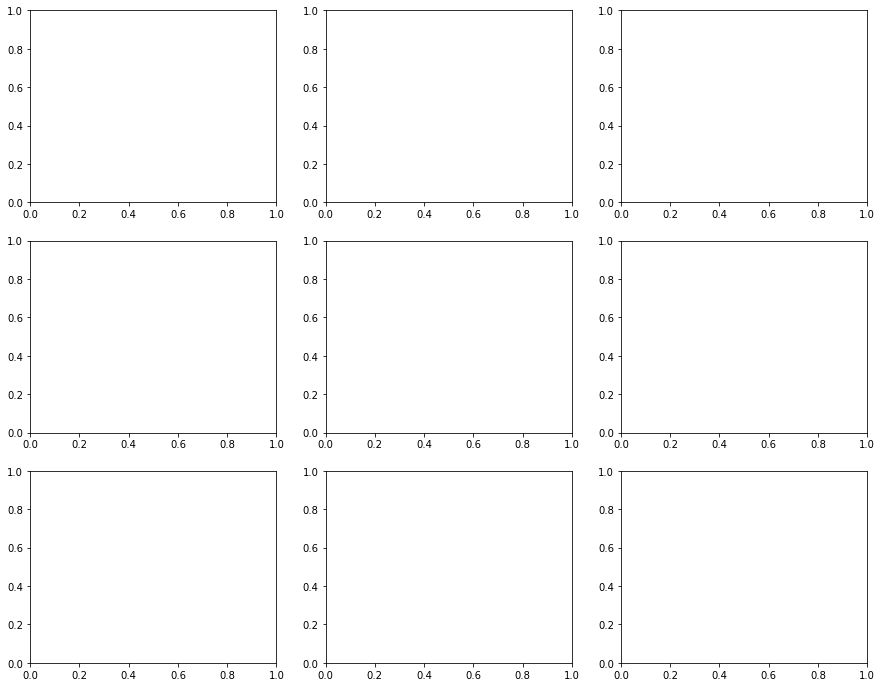

In [26]:
 axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12))

sns.countplot(x="PhoneService", hue="Churn", data=tele_data, ax=axes[0,0])
sns.countplot(x="MultipleLines", hue="Churn", data=tele_data, ax=axes[0,1])
sns.countplot(x="InternetService", hue="Churn", data=tele_data, ax=axes[0,2])
sns.countplot(x="OnlineSecurity", hue="Churn", data=tele_data, ax=axes[1,0])
sns.countplot(x="OnlineBackup", hue="Churn", data=tele_data, ax=axes[1,1])
sns.countplot(x="DeviceProtection", hue="Churn", data=tele_data, ax=axes[1,2])
sns.countplot(x="TechSupport", hue="Churn", data=tele_data, ax=axes[2,0])
sns.countplot(x="StreamingTV", hue="Churn", data=tele_data, ax=axes[2,1])
sns.countplot(x="StreamingMovies", hue="Churn", data=tele_data, ax=axes[2,2])

plt.suptitle("Service Information")
plt.tight_layout()
plt.show()

In [ ]:
sns.countplot(x=tele_data['Churn'])
plt.suptitle('Churn')
plt.title(f"Percentage of positive outcome: {tele_data['Churn'].sum()/len(tele_data)}")
plt.show()